In [1]:
# Predict of the student will get placed from the given CGPA and IQ
#Steps 
# 1. Preprocessing - EDA + Feature Selection
# 2.Extract inpurt and outpur columns
# 3.Scale the values
# 4. Train Test Split
# 5.Train the model
# 6. Evaluate the model/model selection
# 7.Deploy the model

heloo


In [2]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('placement.csv')

In [27]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [29]:
df = df.iloc[:,1:]

In [30]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [31]:
import matplotlib.pyplot as plt

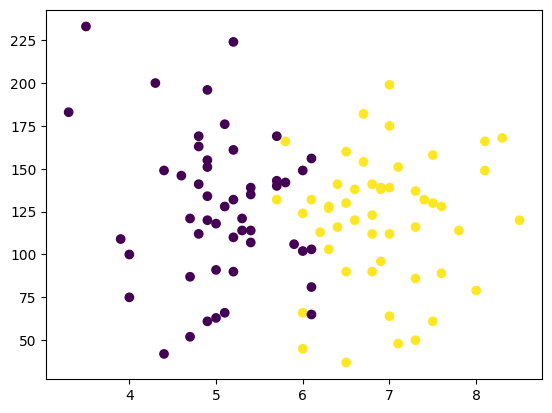

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [35]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [36]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [37]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [39]:
y.shape

(100,)

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [44]:
X_train

,cgpa,iq
46,5.3,114.0
56,6.1,65.0
66,6.9,96.0
86,5.1,128.0
13,6.4,116.0
...,...,...
28,5.2,90.0
47,5.2,161.0
21,7.1,151.0
83,7.5,130.0


In [45]:
y_train

46    0
56    0
66    1
86    0
13    1
     ..
28    0
47    0
21    1
83    1
69    1
Name: placement, Length: 90, dtype: int64

In [46]:
# Scaling the values
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_train

array([[-0.59345547, -0.20768452],
       [ 0.10132167, -1.39715043],
       [ 0.79609881, -0.64463118],
       [-0.76714976,  0.13216288],
       [ 0.36186309, -0.15913489],
       [-0.94084404, -1.49424969],
       [-1.11453833, -1.71272302],
       [-0.2460669 ,  1.12743027],
       [-1.11453833, -0.03776082],
       [-1.20138547,  0.56910954],
       [-0.94084404,  0.27781177],
       [-1.72246832, -0.54753193],
       [ 1.31718166,  0.86040731],
       [ 1.4040288 , -0.81455489],
       [ 0.44871024,  0.18071251],
       [-1.72246832, -1.15440229],
       [ 1.14348738, -0.88737933],
       [ 1.83826451,  1.05460583],
       [ 0.44871024, -2.07684524],
       [ 1.75141737, -1.05730303],
       [ 0.88294595,  1.85567471],
       [-0.68030262, -0.30478378],
       [ 1.31718166, -1.49424969],
       [-1.11453833, -0.86310451],
       [ 0.01447452, -1.88264672],
       [-0.68030262,  2.46254507],
       [-0.94084404,  0.78758287],
       [ 0.88294595, -1.42142525],
       [-1.4619269 ,

In [69]:
X_test = scaler.transform(X_test)

In [70]:
X_test

array([[ 0.03979361, -1.4401682 ],
       [ 0.63669774,  1.02454919],
       [ 0.9351498 ,  2.03943283],
       [-0.05969041, -0.42528457],
       [ 1.53205393, -0.2319734 ],
       [-2.14885486, -1.15020145],
       [ 0.03979361, -0.03866223],
       [-1.15401465,  0.87956582],
       [-0.35814248, -0.03866223],
       [ 0.53721371, -0.61859574]])

In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [72]:
clf.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred = clf.predict(X_test)

In [74]:
y_test

14    0
74    1
52    1
27    1
30    1
31    0
71    1
89    0
87    1
20    1
Name: placement, dtype: int64

In [75]:
from sklearn.metrics import accuracy_score


In [76]:
accuracy_score(y_test,y_pred)

0.6

In [89]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

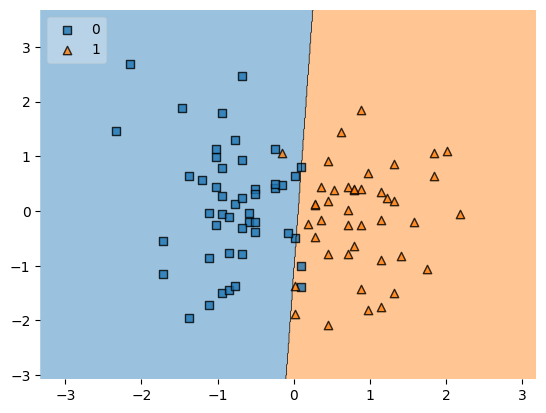

In [92]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [93]:
import pickle

In [95]:
pickle.dump(clf,open('model.pkl','wb'))